### download libraries

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### initial preprocessong & EDA

In [8]:
# function for plotting top 20 categories of a column
def plots(column, df):
  value_counts = df[column].value_counts()
  top_categories = value_counts[:20].index
  df_for_plot = df[df[column].isin(top_categories)]
  value_order = df_for_plot[column].value_counts().sort_values(ascending=False)

  ax = sns.countplot(x=column, data=df_for_plot,
                   palette='ch:start=.5,rot=-.5,light=.8',
                   order = value_order.index)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show()

In [7]:
df = pd.read_csv('/Users/alina/Documents/dissertation/eclipse_all_bugs.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582008 entries, 0 to 582007
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Bug Number   582008 non-null  int64 
 1   Link         582008 non-null  object
 2   Title        568704 non-null  object
 3   Product      568708 non-null  object
 4   Component    568708 non-null  object
 5   Importance   551993 non-null  object
 6   Description  557739 non-null  object
dtypes: int64(1), object(6)
memory usage: 31.1+ MB


In [13]:
df.head()

,Bug Number,Link,Title,Product,Component,Importance,Description
0,1,https://bugs.eclipse.org/bugs/show_bug.cgi?id=1,Usability issue with external editors (1GE6IRL),Platform,Team,P3\n normal,- Setup a project that contains a *.gif resour...
1,2,https://bugs.eclipse.org/bugs/show_bug.cgi?id=2,Opening repository resources doesn't honor typ...,Platform,Team,P5\n normal,Opening repository resource always open the de...
2,3,https://bugs.eclipse.org/bugs/show_bug.cgi?id=3,Sync does not indicate deletion (1GIEN83),Platform,Team,P5\n normal,KM (10/2/2001 5:55:18 PM)\n\tThis PR about the...
3,4,https://bugs.eclipse.org/bugs/show_bug.cgi?id=4,need better error message if catching up over ...,Platform,Team,P5\n normal,- become synchronized with some project in a r...
4,5,https://bugs.eclipse.org/bugs/show_bug.cgi?id=5,ISharingManager sharing API inconsistent (1GAU...,Platform,Team,P3\n normal,For getting/setting the managed state of a res...


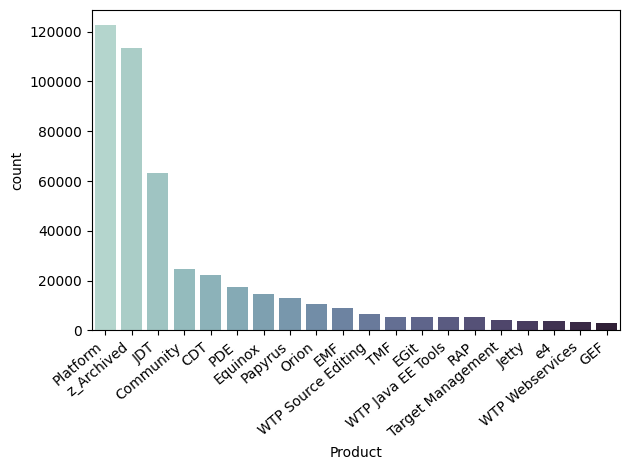

In [10]:
plots('Product', df)

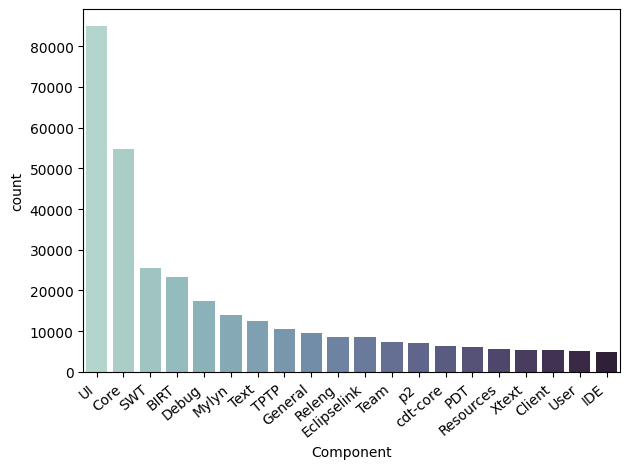

In [11]:
plots('Component', df)

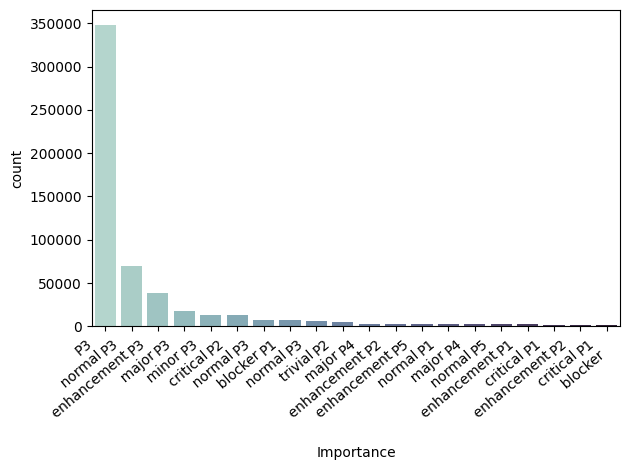

In [9]:
plots('Importance', df)

In [14]:
# making a copy of df to make changes and preprocess
dff = df.copy()

In [15]:
# flattening of target categories
dff['Product_component'] = dff['Product'] + ' ' + dff['Component']
dff = dff.drop(columns=['Product', 'Component'])

In [16]:
# deal with missing values
dff.isna().sum()

Bug Number               0
Link                     0
Title                13304
Importance           30015
Description          24269
Product_component    13300
dtype: int64

In [17]:
# drop rows where data in target and important columns is missing
dff = dff.dropna(subset=['Product_component', 'Description'])

# replace NaN values based on the mode (most frequent category of the column)
mode_value = dff['Importance'].mode()[0]
dff['Importance'].fillna(mode_value, inplace=True)

# replace NaN values with a specific text
dff['Title'].fillna('Unknown', inplace=True)

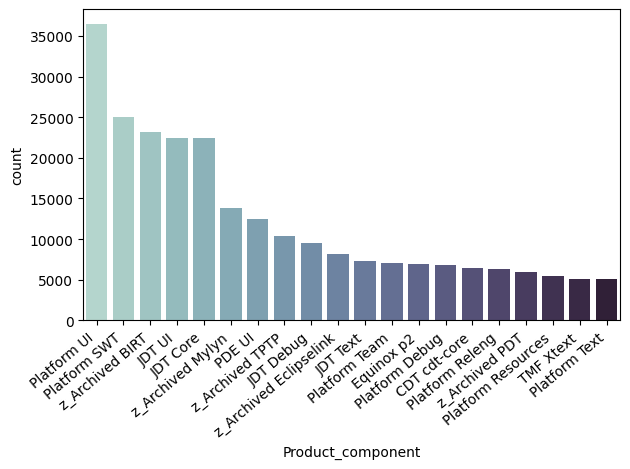

In [18]:
plots('Product_component', dff)